# Illustraion for Zsxp

In [1]:
load("https://raw.githubusercontent.com/jephianlin/publish/master/Gssp_sequence.sage")

In [2]:
### build S(a,b,c), 
### a generalized star with three pending paths on a,b,c vertices respectively

def S(lengths, layout="curved"):
    n = sum(lengths) + 1
    V = list(range(n))
    E = []
    pos = {0: (0,0)}
    for j in range(len(lengths)):
        l = lengths[j]
        ang = j * (2*pi / len(lengths))
        if layout == "curved":
            off = 2*pi / len(lengths) / (l + 1)
        elif layout == "straight":
            off = 0
        for i in range(l):
            ind = sum(lengths[0:j]) + i + 1
            if i == 0:
                E.append((0, ind))
            else:
                E.append((ind - 1, ind))
            pos[ind] = ((i+1)*cos(ang + i*off), (i+1)*sin(ang + i*off))
        g = Graph([V,E], pos=pos)

    return g

def get_new_edges(force):
    """
    Input:
        force: an item given by Gssp_sequence
               for examples, 
               (1, ((2, 3), (3, 1))),
               (2, (0, [1, 4, 8])),
               (3, (0, [1, 2], [4, 5], [8, 9], 2)),
    Output:
        the list of edges to be forced.
        The inputs in the previous example gives:
            [(3,1)]
            [(1, 4), (4, 8), (8, 1)]
            [(1, 5), (2, 4), (1, 9), (2, 8), (4, 9), (5, 8)]
        respectively.
    """
    rule, content = force
    if rule == 1:
        return [content[1]]
    if rule == 2:
        C = content[1]
        l = len(C)
        return [(C[i], C[i+1]) for i in range(l-1)] + [(C[l-1],C[0])]
    if rule == 3:
        paths = content[1:-1]
        l = content[-1]
        new_edge = []
        for b1 in range(2):
            for b2 in range(b1+1,3):
                path1,path2 = paths[b1],paths[b2]
                new_edge += [(path1[i],path2[j]) for i in range(l) for j in range(l) if i+j == l-1]
        return new_edge

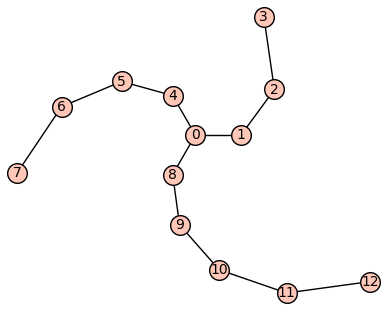

In [3]:
### test function S
g = S([3,4,5])
g.show()

In [4]:
### test function get_new_edges
y,forces = Gssp_sequence(g)
for force in forces:
    print(force, ':', get_new_edges(force))

(1, ((2, 3), (3, 1))) : [(3, 1)]
(1, ((1, 2), (2, 0))) : [(2, 0)]
(1, ((1, 3), (3, 0))) : [(3, 0)]
(1, ((6, 7), (7, 5))) : [(7, 5)]
(1, ((5, 6), (6, 4))) : [(6, 4)]
(1, ((4, 5), (5, 0))) : [(5, 0)]
(1, ((5, 7), (7, 4))) : [(7, 4)]
(1, ((4, 6), (6, 0))) : [(6, 0)]
(1, ((4, 7), (7, 0))) : [(7, 0)]
(1, ((11, 12), (12, 10))) : [(12, 10)]
(1, ((10, 11), (11, 9))) : [(11, 9)]
(1, ((9, 10), (10, 8))) : [(10, 8)]
(1, ((8, 9), (9, 0))) : [(9, 0)]
(1, ((10, 12), (12, 9))) : [(12, 9)]
(1, ((9, 11), (11, 8))) : [(11, 8)]
(1, ((8, 10), (10, 0))) : [(10, 0)]
(1, ((9, 12), (12, 8))) : [(12, 8)]
(1, ((8, 11), (11, 0))) : [(11, 0)]
(1, ((8, 12), (12, 0))) : [(12, 0)]
(2, (0, [1, 4, 8])) : [(1, 4), (4, 8), (8, 1)]
(3, (0, [1, 2], [4, 5], [8, 9], 2)) : [(1, 5), (2, 4), (1, 9), (2, 8), (4, 9), (5, 8)]
(3, (0, [1, 2, 3], [4, 5, 6], [8, 9, 10], 3)) : [(1, 6), (2, 5), (3, 4), (1, 10), (2, 9), (3, 8), (4, 10), (5, 9), (6, 8)]
(1, ((4, 3), (3, 5))) : [(3, 5)]
(1, ((5, 2), (2, 6))) : [(2, 6)]
(1, ((6, 1), (1, 7

In [5]:
g = S([3,4,5])
y,forces = Gssp_sequence(g)
news = [get_new_edges(force) for force in forces]

border = False
pics = [g.plot(graph_border=border)]
h = g.copy()
cs = {'black': g.edges(labels=False), 
      'blue': [], 
      'purple': []
     }

last = []
# hs = [h.copy()]

for new_edges in news:
    h.add_edges(new_edges)
    cs['blue'] += last
    cs['purple'] = new_edges
    last = new_edges
#     print(cs)
#     hs.append(h.copy())
    pics.append(h.plot(edge_colors=cs, graph_border=border))

Animation with 52 frames
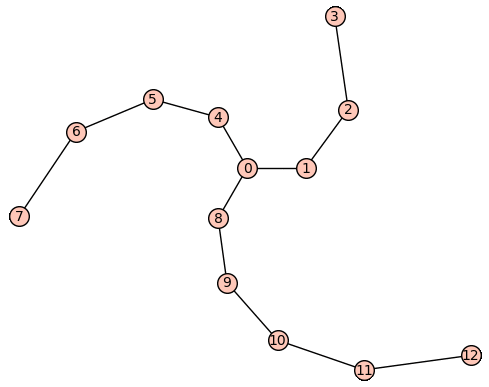

In [6]:
s345_Zssp_animate = animate(pics)
s345_Zssp_animate

In [7]:
s345_Zssp_animate.save('s345_Zssp_animate.gif', delay=50)